#  Chapter 5, demo 2

Bayesian Data Analysis, 3rd ed


Hierarchical model for SAT-example data (BDA3, p. 102).

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import preliz as pz
pz.style.use('preliz-doc')

In [2]:
# SAT-example data (BDA3 p. 120)
# y is the estimated treatment effect
# s is the standard error of effect estimate
y = np.array([28,  8, -3,  7, -1,  1, 18, 12])
s = np.array([15, 10, 16, 11,  9, 11, 10, 18])
M = len(y)

In [3]:
# load the pre-computed results for the hierarchical model
# replace this with your own code in Ex 5.1*
hres_path = os.path.abspath(
    os.path.join(
        os.path.pardir,
        'utilities_and_data',
        'demo5_2.npz'
    )
)
hres = np.load(hres_path)
''' Content information of the precalculated results:
name  shape      dtype
------------------------
pxm   (8, 500)   float64
t     (1000,)    float64
tp    (1000,)    float64
tsd   (8, 1000)  float64
tm    (8, 1000)  float64
'''
pxm = hres['pxm']
t   = hres['t']
tp  = hres['tp']
tsd = hres['tsd']
tm  = hres['tm']
hres.close()

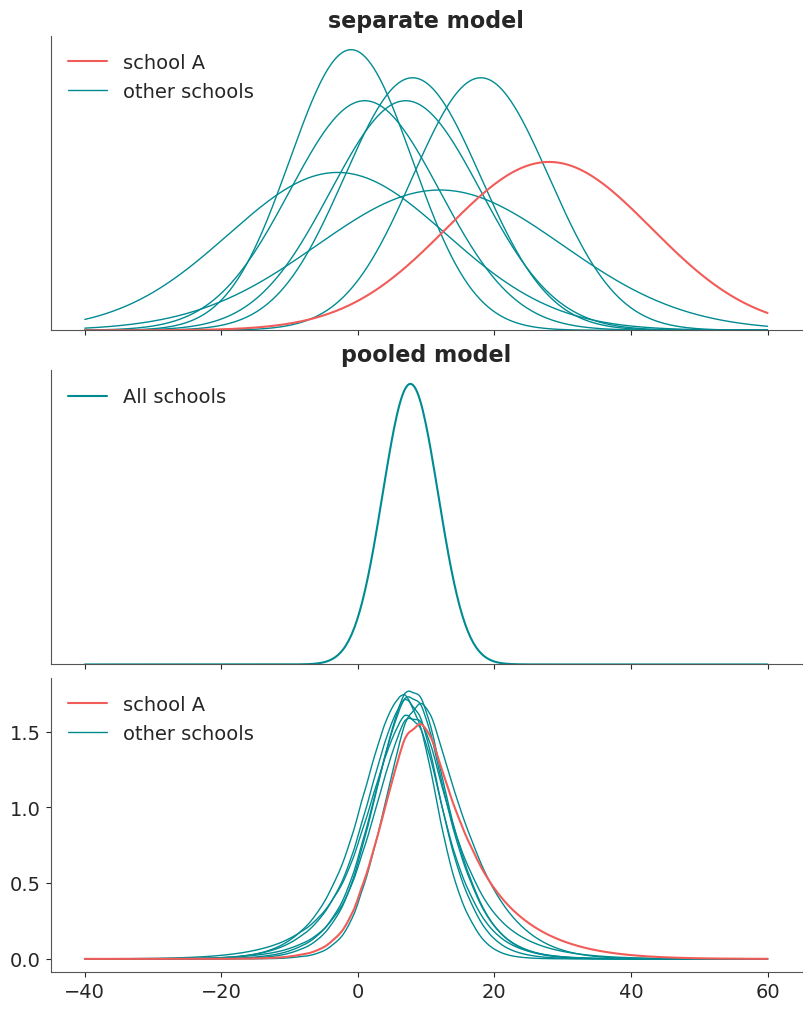

In [4]:
_, (ax_sep, ax_pool, ax_hier) = plt.subplots(3, 1, sharex=True, figsize=(8, 10))
x = np.linspace(-40, 60, 500)

# Separate model
lines = ax_sep.plot(x, pz.Normal(y[1:], s[1:]).pdf(x[:, None]), color="C0", lw=1)
line_a, = ax_sep.plot(x, pz.Normal(y[0], s[0]).pdf(x), color="C2")
ax_sep.legend([line_a, lines[0]], ["school A", "other schools"], loc="upper left")
ax_sep.set(yticks=[], ylim=0, title="separate model")

# Pooled model
mean_pooled = np.sum(y / s**2) / np.sum(1 / s**2)
std_pooled = np.sqrt(1 / np.sum(1 / s**2))
ax_pool.plot(x, pz.Normal(mean_pooled, std_pooled).pdf(x), label="All schools")
ax_pool.legend(loc="upper left")
ax_pool.set(yticks=[], ylim=0, title="pooled model")

# Hierarchical model
lines = ax_hier.plot(x, pxm[1:].T, color="C0", lw=1)
line_a, = ax_hier.plot(x, pxm[0], color="C2")
ax_hier.legend([line_a, lines[0]], ["school A", "other schools"], loc="upper left");

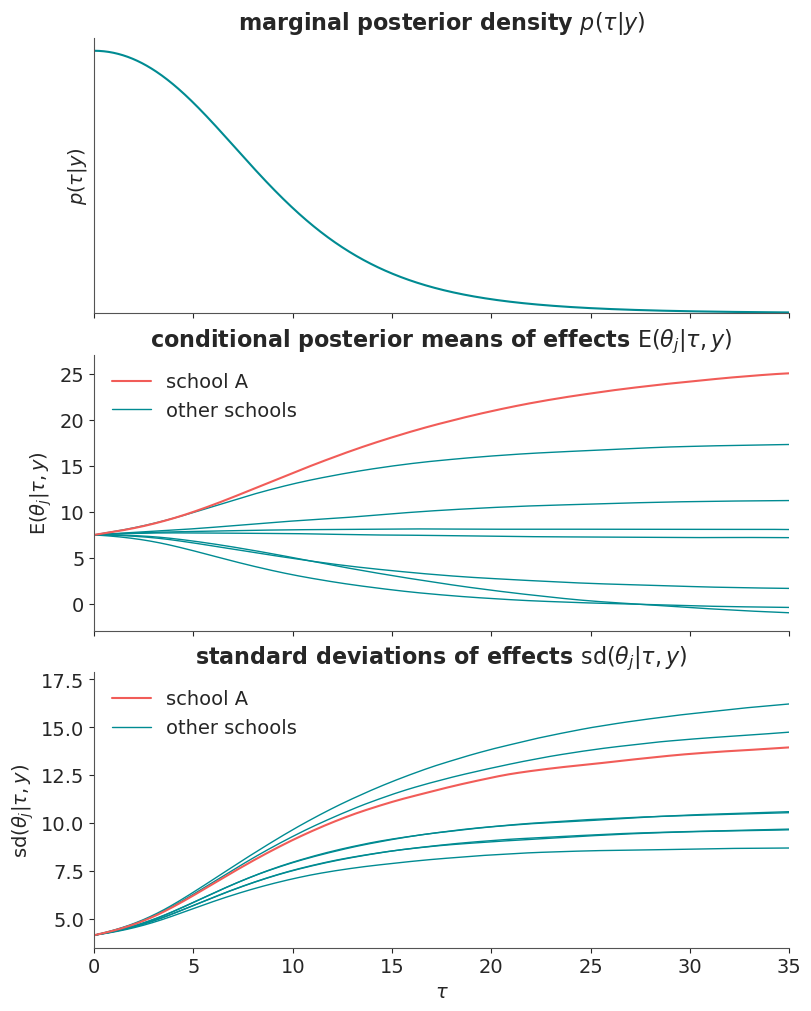

In [5]:
_, (ax_marg, ax_mean, ax_sd) = plt.subplots(3, 1, sharex=True, figsize=(8, 10))

# Marginal posterior of tau
ax_marg.plot(t, tp)
ax_marg.set(yticks=[], ylim=0, xlim=(0, 35),
            ylabel=r"$p(\tau|y)$",
            title=r"marginal posterior density $p(\tau|y)$")

# Conditional posterior means
lines = ax_mean.plot(t, tm[1:].T, color="C0", lw=1)
line_a, = ax_mean.plot(t, tm[0].T, color="C2")
ax_mean.legend([line_a, lines[0]], ["school A", "other schools"], loc="upper left")
ax_mean.set(ylabel=r"$\operatorname{E}(\theta_j|\tau,y)$",
            title=r"conditional posterior means of effects $\operatorname{E}(\theta_j|\tau,y)$")

# Conditional posterior standard deviations
lines = ax_sd.plot(t, tsd[1:].T, color="C0", lw=1)
line_a, = ax_sd.plot(t, tsd[0].T, color="C2")
ax_sd.legend([line_a, lines[0]], ["school A", "other schools"], loc="upper left")
ax_sd.set(xlabel=r"$\tau$", ylabel=r"$\operatorname{sd}(\theta_j|\tau,y)$",
          title=r"standard deviations of effects $\operatorname{sd}(\theta_j|\tau,y)$");
